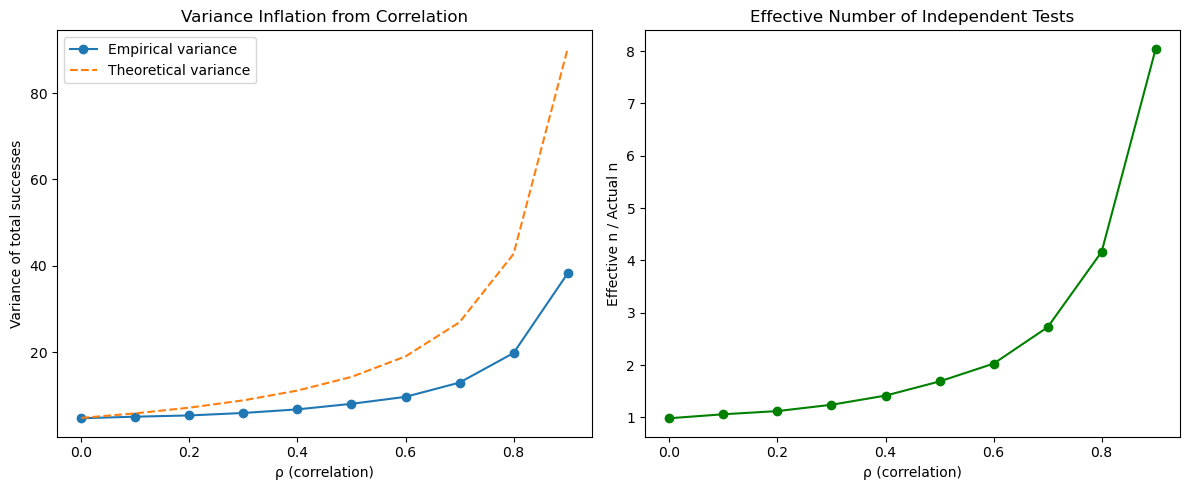

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf  

def generate_correlated_bernoulli(n, p, rho, n_sim=10000):
    """
    Generates correlated Bernoulli sequences using a Gaussian copula approach.
    """
    # Generate multivariate normal with exponential decay correlation structure
    cov = rho ** np.abs(np.subtract.outer(np.arange(n), np.arange(n)))
    mean = np.zeros(n)
    samples = np.random.multivariate_normal(mean, cov, size=n_sim)
    
    # Convert to uniform using CDF, then to Bernoulli
    uniforms = 0.5 * (1 + erf(samples / np.sqrt(2)))
    bernoullis = (uniforms < p).astype(int)
    
    return bernoullis

# Parameters
n = 100
p = 0.05
q = 1 - p
rhos = np.linspace(0.0, 0.9, 10)
n_sim = 10000

empirical_vars = []
theoretical_vars = []
effective_n = []

for rho in rhos:
    trials = generate_correlated_bernoulli(n, p, rho, n_sim)
    sums = trials.sum(axis=1)
    empirical_var = np.var(sums)
    empirical_vars.append(empirical_var)

    var_theory = n * p * q * (1 + 2 * rho / (1 - rho))
    theoretical_vars.append(var_theory)

    eff_n = empirical_var / (p * q)
    effective_n.append(eff_n)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rhos, empirical_vars, 'o-', label='Empirical variance')
plt.plot(rhos, theoretical_vars, '--', label='Theoretical variance')
plt.xlabel("ρ (correlation)")
plt.ylabel("Variance of total successes")
plt.title("Variance Inflation from Correlation")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rhos, np.array(effective_n) / n, 'o-', color='green')
plt.xlabel("ρ (correlation)")
plt.ylabel("Effective n / Actual n")
plt.title("Effective Number of Independent Tests")

plt.tight_layout()
plt.show()

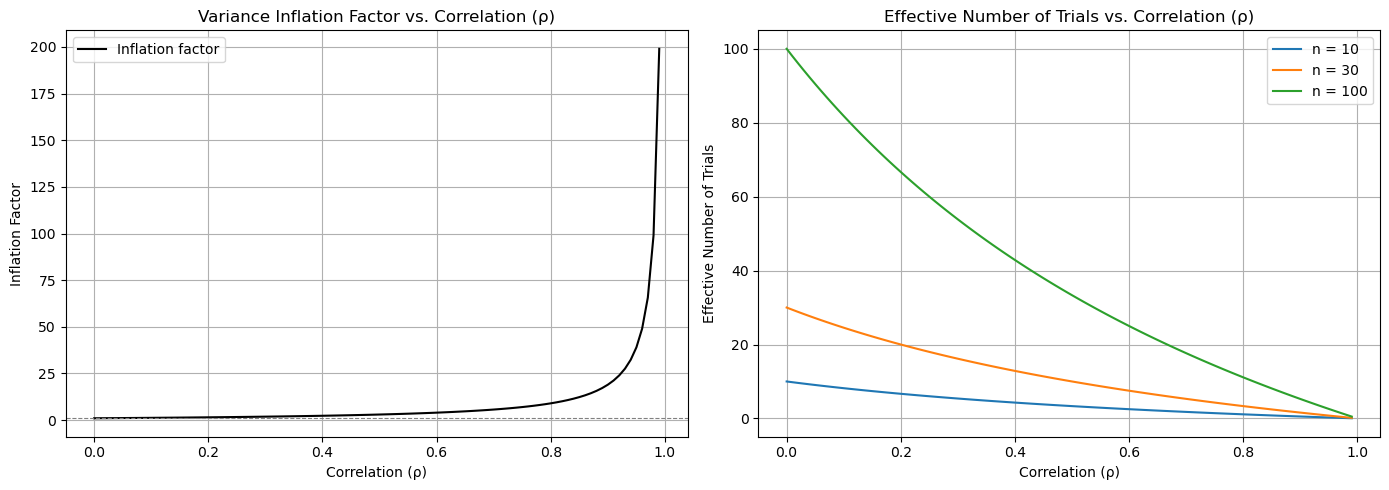

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Range of correlation values (rho)
rho_values = np.linspace(0, 0.99, 100)

# 1. Variance inflation factor: 1 + 2*rho / (1 - rho)
inflation_factors = 1 + 2 * rho_values / (1 - rho_values)

# 2. Effective number of trials for different values of n
n_values = [10, 30, 100]
n_eff_curves = {n: n * (1 - rho_values) / (1 + rho_values) for n in n_values}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel 1: Variance inflation factor
axes[0].plot(rho_values, inflation_factors, label='Inflation factor', color='black')
axes[0].set_title("Variance Inflation Factor vs. Correlation (ρ)")
axes[0].set_xlabel("Correlation (ρ)")
axes[0].set_ylabel("Inflation Factor")
axes[0].grid(True)
axes[0].axhline(1, color='gray', linestyle='--', linewidth=0.8)
axes[0].legend()

# Panel 2: Effective number of trials
for n in n_values:
    axes[1].plot(rho_values, n_eff_curves[n], label=f"n = {n}")
axes[1].set_title("Effective Number of Trials vs. Correlation (ρ)")
axes[1].set_xlabel("Correlation (ρ)")
axes[1].set_ylabel("Effective Number of Trials")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

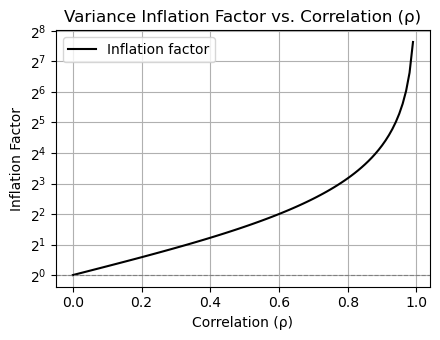

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Range of correlation values (rho)
rho_values = np.linspace(0, 0.99, 100)

# 1. Variance inflation factor: 1 + 2*rho / (1 - rho)
inflation_factors = 1 + 2 * rho_values / (1 - rho_values)

# 2. Effective number of trials for different values of n
n_values = [10, 30, 100]
n_eff_curves = {n: n * (1 - rho_values) / (1 + rho_values) for n in n_values}

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))

# Panel 1: Variance inflation factor
ax.plot(rho_values, inflation_factors, label='Inflation factor', color='black')
ax.set_title("Variance Inflation Factor vs. Correlation (ρ)")
ax.set_xlabel("Correlation (ρ)")
ax.set_ylabel("Inflation Factor")
ax.set_yscale('log', base=2)
ax.grid(True)
ax.axhline(1, color='gray', linestyle='--', linewidth=0.8)
ax.legend()

plt.tight_layout()
plt.show()

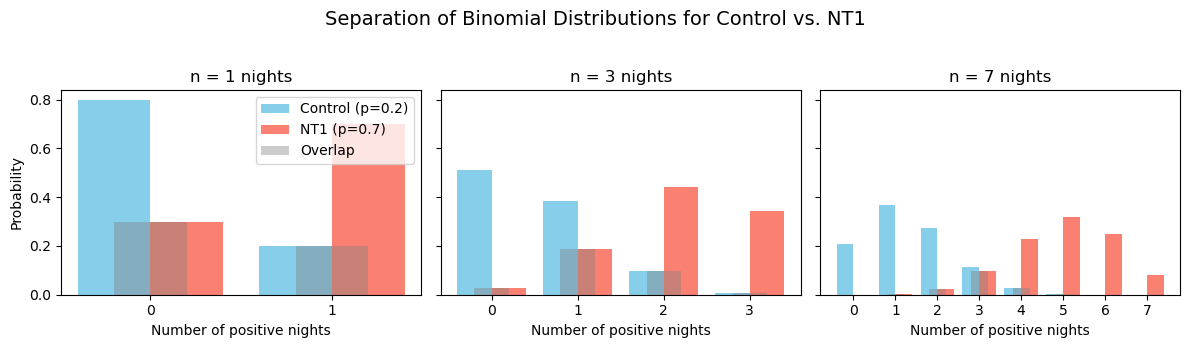

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
p_nt1 = 0.7
p_control = 0.2
n_values = [1, 3, 7]

# Create figure
fig, axes = plt.subplots(1, len(n_values), figsize=(12, 3.5), sharey=True)

for i, n in enumerate(n_values):
    x = np.arange(0, n + 1)
    pmf_nt1 = binom.pmf(x, n, p_nt1)
    pmf_control = binom.pmf(x, n, p_control)

    # Overlap region (min of both distributions)
    overlap = np.minimum(pmf_nt1, pmf_control)

    ax = axes[i]
    ax.bar(x - 0.2, pmf_control, width=0.4, color='skyblue', label='Control (p=0.2)')
    ax.bar(x + 0.2, pmf_nt1, width=0.4, color='salmon', label='NT1 (p=0.7)')
    ax.bar(x, overlap, width=0.4, color='gray', alpha=0.4, label='Overlap')

    ax.set_title(f"n = {n} nights")
    ax.set_xlabel("Number of positive nights")
    ax.set_xticks(x)
    if i == 0:
        ax.set_ylabel("Probability")

axes[0].legend(loc="upper right")
fig.suptitle("Separation of Binomial Distributions for Control vs. NT1", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

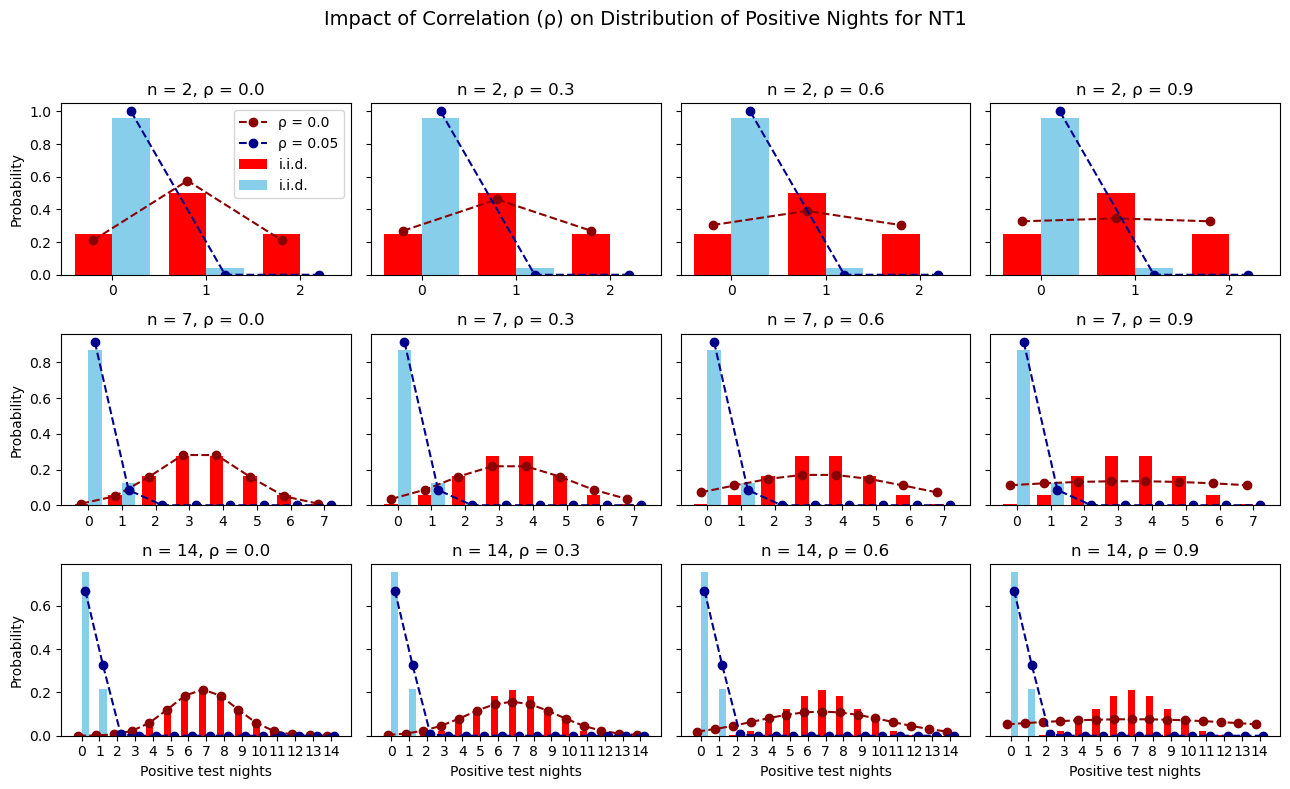

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
p = 0.5  # Probability of success for NT1
p_con = 0.02 # Probability of success for control
n_values = [2, 7, 14]
rho_values = [0.0, 0.3, 0.6, 0.9]  # Different correlation strengths
rho_values_con = [0.05, 0.05, 0.05, 0.05]

# Function to approximate variance inflation factor
def variance_inflation_factor(rho):
    return 1 + 2 * rho / (1 - rho + 1e-5)

# Create plot
fig, axes = plt.subplots(len(n_values), len(rho_values), figsize=(13, 8), sharey='row')

for i, n in enumerate(n_values):
    x = np.arange(0, n + 1)
    pmf_iid = binom.pmf(x, n, p)
    pmf_iid_con = binom.pmf(x, n, p_con)

    for j, rho in enumerate(rho_values):

        rho_con = rho_values_con[j]
        ax = axes[i, j]
        vif = variance_inflation_factor(rho)
        vif_con = variance_inflation_factor(rho_con)

        # Adjusted stddev using inflated variance
        std_iid = np.sqrt(n * p * (1 - p))
        std_corr = np.sqrt(vif) * std_iid
        # con
        std_iid_con = np.sqrt(n * p_con * (1 - p_con))
        std_corr_con = np.sqrt(vif_con) * std_iid_con

        # Approximate correlated distribution using Gaussian
        mu = n * p
        y_corr = np.exp(-0.5 * ((x - mu) / std_corr) ** 2)
        y_corr /= y_corr.sum()  # normalize

        mu_con = n * p_con
        y_corr_con = np.exp(-0.5 * ((x - mu_con) / std_corr_con) ** 2)
        y_corr_con /= y_corr_con.sum()

        #ax.bar(x, y_corr, width=0.4, label='', color='pink', alpha=0.5)
        ax.bar(x-0.2, pmf_iid, width=0.4, label='i.i.d.', color='red')
        ax.plot(x-0.2, y_corr, 'o--', color='darkred', label=f'ρ = {rho}')
        
        # controls
        # ax.bar(x, y_corr_con, width=0.4, label='', color='pink', alpha=0.5)
        ax.bar(x+0.2, pmf_iid_con, width=0.4, label='i.i.d.', color='skyblue')
        ax.plot(x+0.2, y_corr_con, 'o--', color='darkblue', label=f'ρ = {rho_con}')
        
        ax.set_title(f"n = {n}, ρ = {rho}")
        ax.set_xticks(x)
        if j == 0:
            ax.set_ylabel("Probability")
        if i == len(n_values) - 1:
            ax.set_xlabel("Positive test nights")
        if i == 0 and j == 0:
            ax.legend()

fig.suptitle("Impact of Correlation (ρ) on Distribution of Positive Nights for NT1", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

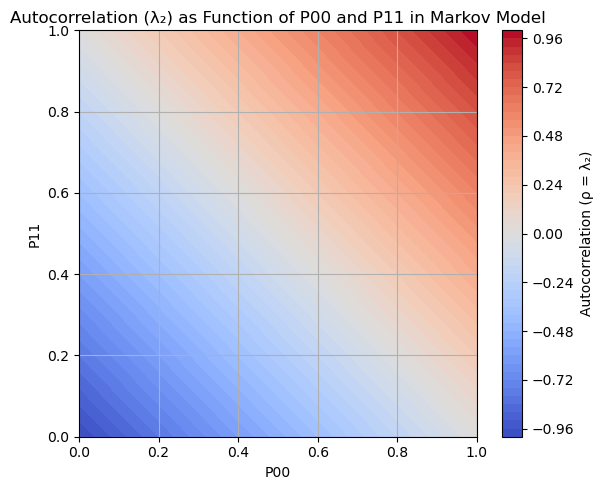

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a range of P00 and P11 values such that 0 <= P00, P11 <= 1
p_vals = np.linspace(0, 1, 100)
P00, P11 = np.meshgrid(p_vals, p_vals)

# Compute lambda_2 and autocorrelation
lambda_2 = P00 + P11 - 1  # Second eigenvalue
autocorrelation = lambda_2  # Since rho = lambda_2

# Plotting
plt.figure(figsize=(6, 5))
contour = plt.contourf(P00, P11, autocorrelation, levels=50, cmap='coolwarm')
plt.colorbar(contour, label='Autocorrelation (ρ = λ₂)')
plt.xlabel('P00')
plt.ylabel('P11')
plt.title('Autocorrelation (λ₂) as Function of P00 and P11 in Markov Model')
plt.grid(True)
plt.tight_layout()
plt.show()

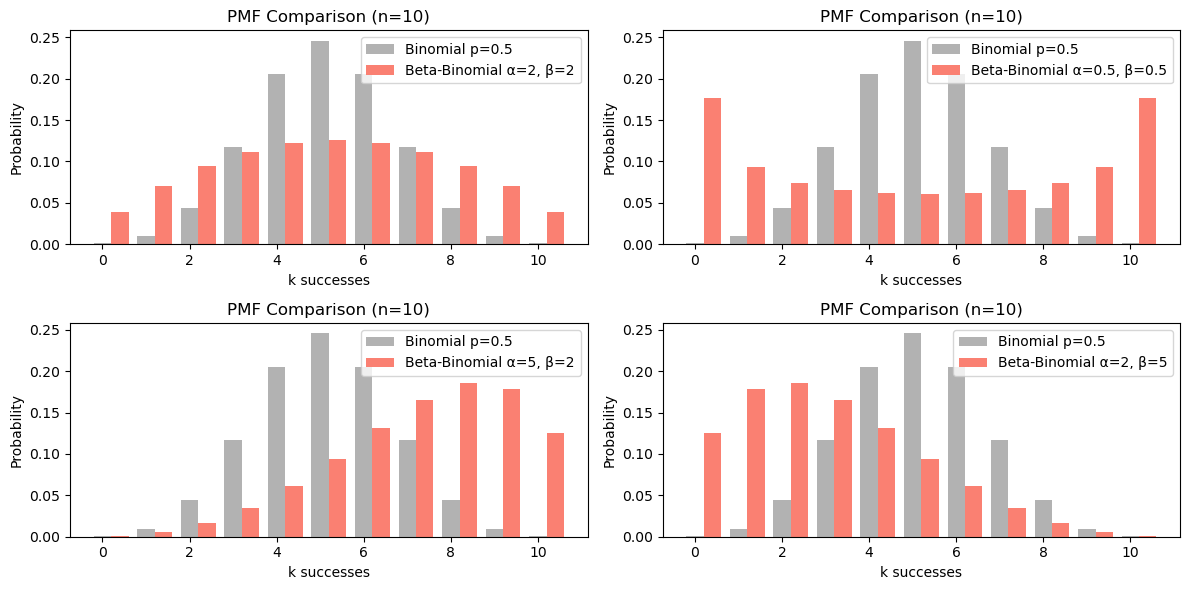

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, betabinom, beta

# Parameters
n = 10  # number of trials
k = np.arange(0, n + 1)

# Binomial distribution with fixed p
p_fixed = 0.5
pmf_binom = binom.pmf(k, n, p_fixed)

# Beta-binomial with different alpha, beta
params = [(2, 2), (0.5, 0.5), (5, 2), (2, 5)]
pmf_betabinoms = [betabinom.pmf(k, n, a, b) for a, b in params]

# Plot PMFs
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.ravel()
for i, (a, b) in enumerate(params):
    axs[i].bar(k, pmf_binom, width=0.4, label='Binomial p=0.5', alpha=0.6, color='gray')
    axs[i].bar(k + 0.4, pmf_betabinoms[i], width=0.4, label=f'Beta-Binomial α={a}, β={b}', color='salmon')
    axs[i].set_title(f"PMF Comparison (n={n})")
    axs[i].set_xlabel("k successes")
    axs[i].set_ylabel("Probability")
    axs[i].legend()

plt.tight_layout()


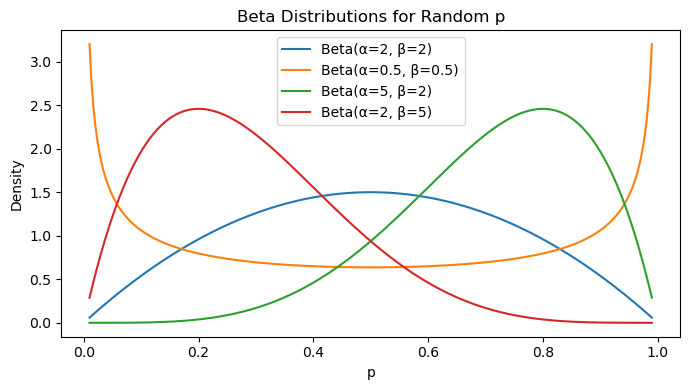

In [24]:

# Plot Beta distributions used for p
x = np.linspace(0.01, 0.99, 300)
fig, ax = plt.subplots(figsize=(7, 4))
for a, b in params:
    ax.plot(x, beta.pdf(x, a, b), label=f'Beta(α={a}, β={b})')
ax.set_title("Beta Distributions for Random p")
ax.set_xlabel("p")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()

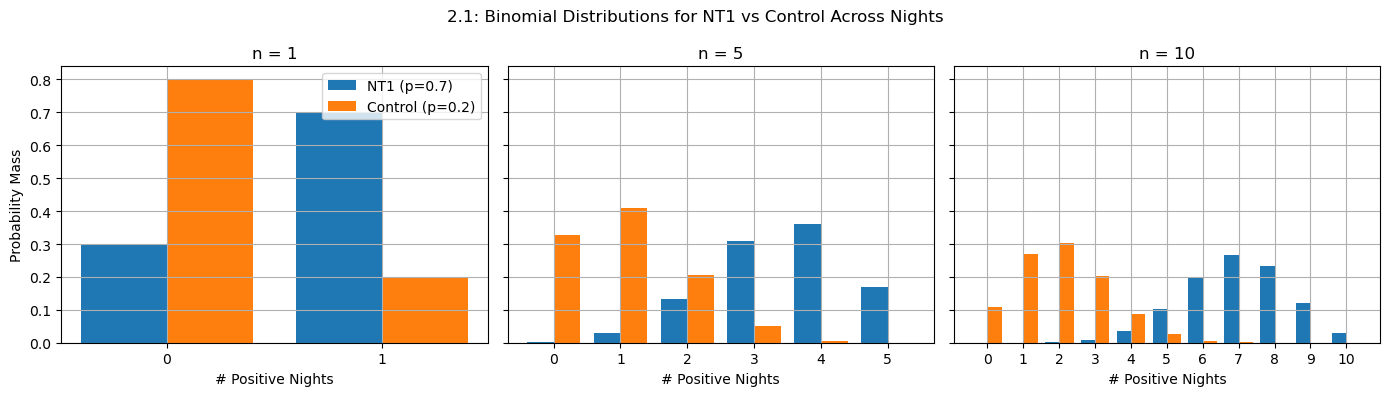

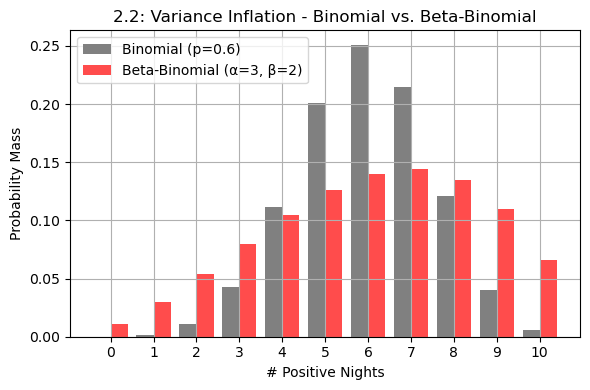

In [26]:
# Re-importing necessary libraries after code execution environment reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, betabinom

# Parameters
n_values = [1, 5, 10]
p_nt1 = 0.7
p_control = 0.2
n_max = max(n_values)
k_vals = np.arange(0, n_max + 1)

# Colors
nt1_color = 'tab:blue'
control_color = 'tab:orange'

# 2.1: Binomial separation plot
fig, axs = plt.subplots(1, len(n_values), figsize=(14, 4), sharey=True)
for i, n in enumerate(n_values):
    k_vals = np.arange(0, n + 1)
    axs[i].bar(k_vals - 0.2, binom.pmf(k_vals, n, p_nt1), width=0.4, label='NT1 (p=0.7)', color=nt1_color)
    axs[i].bar(k_vals + 0.2, binom.pmf(k_vals, n, p_control), width=0.4, label='Control (p=0.2)', color=control_color)
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel('# Positive Nights')
    axs[i].set_xticks(k_vals)
    axs[i].grid(True)

axs[0].set_ylabel('Probability Mass')
axs[0].legend()
fig.suptitle('2.1: Binomial Distributions for NT1 vs Control Across Nights')
plt.tight_layout()
plt.show()

# 2.2: Variance inflation effect using Beta-Binomial
n = 10
alpha = 3
beta = 2  # Mean = 0.6, closer to NT1
k_vals = np.arange(0, n + 1)
pmf_binom = binom.pmf(k_vals, n, 0.6)
pmf_beta_binom = betabinom.pmf(k_vals, n, alpha, beta)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(k_vals - 0.2, pmf_binom, width=0.4, label='Binomial (p=0.6)', color='gray')
plt.bar(k_vals + 0.2, pmf_beta_binom, width=0.4, label='Beta-Binomial (α=3, β=2)', color='red', alpha=0.7)
plt.title('2.2: Variance Inflation - Binomial vs. Beta-Binomial')
plt.xlabel('# Positive Nights')
plt.ylabel('Probability Mass')
plt.xticks(k_vals)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Conway-Maxwell-Binomial PMF

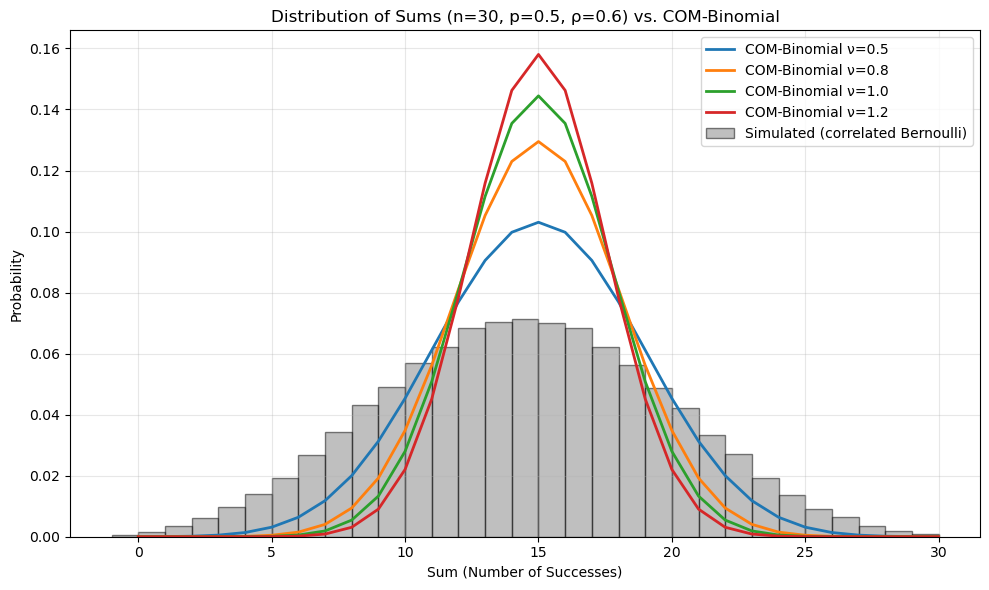

In [25]:
# Re-import after state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import comb, factorial

# Simulate correlated Bernoulli sums (Markov-like approach with correlation rho)
def simulate_correlated_sums(n, p, rho, n_sim):
    trials = np.zeros((n_sim, n), dtype=int)
    for sim in range(n_sim):
        trials[sim, 0] = np.random.rand() < p
        for t in range(1, n):
            if np.random.rand() < rho:
                trials[sim, t] = trials[sim, t-1]
            else:
                trials[sim, t] = np.random.rand() < p
    return trials.sum(axis=1)

# Conway-Maxwell-Binomial PMF
def com_binomial_pmf(n, p, nu):
    Z = np.sum([comb(n, k)**nu * (p**k) * ((1 - p)**(n - k)) for k in range(n + 1)])
    pmf = np.array([comb(n, k)**nu * (p**k) * ((1 - p)**(n - k)) / Z for k in range(n + 1)])
    return pmf

# Parameters
n = 30
p = 0.5
rho = 0.6
n_sim = 100000

# Simulate correlated Bernoulli
sums_correlated = simulate_correlated_sums(n, p, rho, n_sim)
counts, bins = np.histogram(sums_correlated, bins=np.arange(n + 2) - 0.5, density=True)

# COM-Binomial PMFs for various nu
nu_values = [0.5, 0.8, 1.0, 1.2]
com_pmfs = {nu: com_binomial_pmf(n, p, nu) for nu in nu_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], counts, width=1.0, alpha=0.5, label='Simulated (correlated Bernoulli)', color='gray', edgecolor='black')

for nu, pmf in com_pmfs.items():
    plt.plot(np.arange(n + 1), pmf, label=f'COM-Binomial ν={nu}', linewidth=2)

plt.title(f"Distribution of Sums (n={n}, p={p}, ρ={rho}) vs. COM-Binomial")
plt.xlabel("Sum (Number of Successes)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

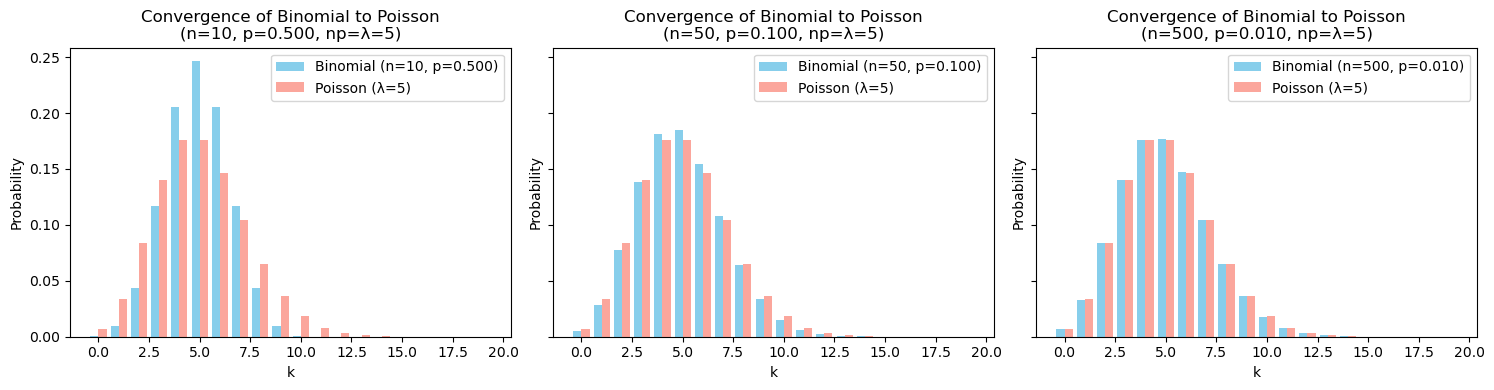

In [45]:
# Re-run after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Set a constant expected value
lambda_ = 5
p_values = [0.5, 0.1, 0.01]
n_values = [int(lambda_ / p) for p in p_values]  # Ensure np = lambda

x = np.arange(0, 20)

fig, axs = plt.subplots(1, len(p_values), figsize=(15, 4), sharey=True)

for i, (n, p) in enumerate(zip(n_values, p_values)):
    binom_pmf = binom.pmf(x, n, p)
    pois_pmf = poisson.pmf(x, lambda_)

    axs[i].bar(x - 0.2, binom_pmf, width=0.4, label=f'Binomial (n={n}, p={p:.3f})', color='skyblue')
    axs[i].bar(x + 0.2, pois_pmf, width=0.4, label='Poisson (λ=5)', color='salmon', alpha=0.7)
    axs[i].set_title(f'Convergence of Binomial to Poisson\n(n={n}, p={p:.3f}, np=λ=5)')
    axs[i].set_xlabel('k')
    axs[i].set_ylabel('Probability')
    axs[i].legend()

plt.tight_layout()
plt.show()